In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.set_option('display.max_colwidth', None)

In [2]:
df = pd.read_csv("Train.csv")
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [3]:
df.Outlet_Size.isnull().sum()

2410

In [4]:
df.Outlet_Size.mode()

0    Medium
dtype: object

In [5]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

[Text(0, 0, '2793'), Text(0, 0, '932'), Text(0, 0, '2388')]

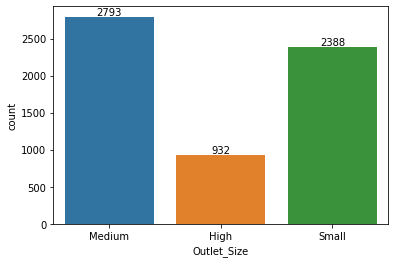

In [16]:
g1 = sns.countplot(x="Outlet_Size", data=df)

g1.bar_label(g1.containers[0])

### Outlet_Size  vs  Outlet_Type

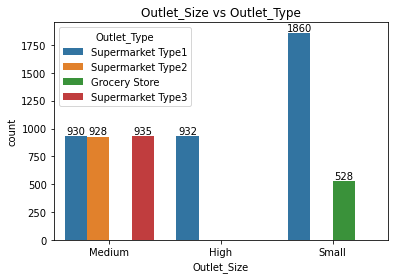

In [14]:
plt.title("Outlet_Size vs Outlet_Type")
g1 = sns.countplot(x="Outlet_Size", hue="Outlet_Type", data=df)

for container in g1.containers:
    g1.bar_label(container)

From the above output cell, 
### Assumption 1
    1. Products in Grocery Store always have Small Outlet Size.

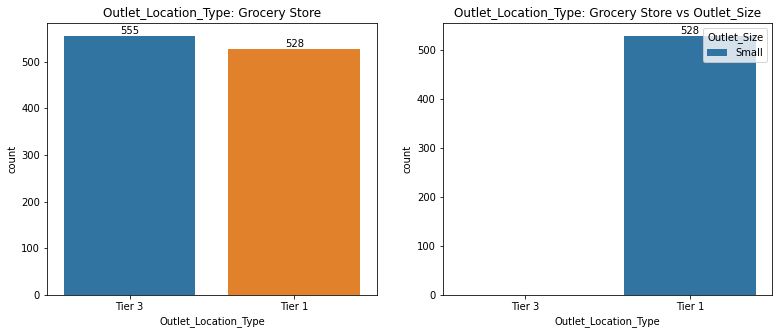

In [33]:
plt.figure(figsize=(13,5))

plt.subplot(1,2,1)
plt.title("Outlet_Location_Type: Grocery Store")
g1 = sns.countplot(x="Outlet_Location_Type", data=df[df.Outlet_Type == "Grocery Store"])
for container in g1.containers:
    g1.bar_label(container)

plt.subplot(1,2,2)
plt.title("Outlet_Location_Type: Grocery Store vs Outlet_Size")
g2 = sns.countplot(x="Outlet_Location_Type", hue="Outlet_Size", data=df[df.Outlet_Type == "Grocery Store"])
for container in g2.containers:
    g2.bar_label(container)

In [34]:
# Filling nan value in outlet_size column with "Small" if the products outlet_type is grocery store

for i in range(0, len(df)):
    if pd.isnull(df.at[i, 'Outlet_Size']) and df.at[i, 'Outlet_Type']=="Grocery Store":
        df.at[i, 'Outlet_Size'] = "Small"

### After missing value treatment with assumption 1

In [35]:
# Remaining missing value count in outlet size

df.Outlet_Size.isnull().sum()

1855

In [36]:
# No of rows with nan value in outlet_size column if the products outlet_type is Supermarket Type3

df[df['Outlet_Type'] == "Supermarket Type1"].Outlet_Size.isnull().sum()

1855

In [37]:
# No of rows with nan value in outlet_size column if the products outlet_type is Supermarket Type1 and outlet_location_type is Tier 3

key_names = ["Outlet_Type", "Outlet_Location_Type"]
keys = ["Supermarket Type1", "Tier 2"]

temp = df[(df[key_names] == keys).all(1)]

In [38]:
len(temp)

2785

In [39]:
temp.Outlet_Size.isnull().sum()

1855

In [40]:
temp.Outlet_Size.value_counts()

Small    930
Name: Outlet_Size, dtype: int64

From the above 5 output cells, 
### Assumption 2
    Products distributed to Supermarket Type1 with Tier 2 location always have small product size

In [42]:
# Filling nan value in outlet_size column with "Small" if the products outlet_type is supermarket type1 and outlet location is tier2

for i in range(0, len(df)):
    if pd.isnull(df.at[i, 'Outlet_Size']) and df.at[i, 'Outlet_Type']=="Supermarket Type1" and df.at[i, 'Outlet_Location_Type']=="Tier 2":
        df.at[i, 'Outlet_Size'] = "Small"

### After missing value treatment with assumption 2

In [43]:
df.Outlet_Size.isnull().sum()

0

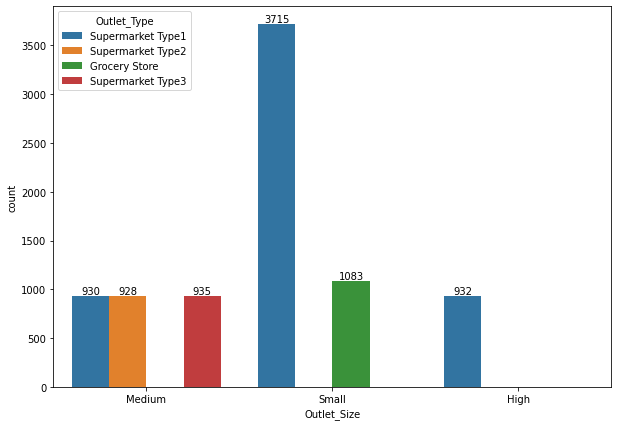

In [68]:
plt.figure(figsize=(10,7))
g1 = sns.countplot(x="Outlet_Size", hue="Outlet_Type", data=df)

for container in g1.containers:
    g1.bar_label(container)

## Additional Info's

In [45]:
df_bmv = pd.read_csv("Train.csv")

In [59]:
outlet_identifiers = ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']

for i in outlet_identifiers:
    temp = df_bmv[df_bmv.Outlet_Identifier == str(i)]
    print(i, "\t", len(temp), "\t", temp.Outlet_Size.isnull().sum())

OUT049 	 930 	 0
OUT018 	 928 	 0
OUT010 	 555 	 555
OUT013 	 932 	 0
OUT027 	 935 	 0
OUT045 	 929 	 929
OUT017 	 926 	 926
OUT046 	 930 	 0
OUT035 	 930 	 0
OUT019 	 528 	 0


In [57]:
outlet_identifiers = ['OUT049', 'OUT018', 'OUT013', 'OUT027', 'OUT046', 'OUT035', 'OUT019']

for i in outlet_identifiers:
    temp = df_bmv[df_bmv.Outlet_Identifier == str(i)]
    print(i, "\t", len(temp), "\t", temp.Outlet_Size.unique()[0])

OUT049 	 930 	 Medium
OUT018 	 928 	 Medium
OUT013 	 932 	 High
OUT027 	 935 	 Medium
OUT046 	 930 	 Small
OUT035 	 930 	 Small
OUT019 	 528 	 Small
